# 1. Load and Explore the IMDB dataset

This section focuses on loading and exploring the IMDB dataset for sentiment analysis. It includes importing necessary libraries, loading the dataset with a predefined number of words, and displaying basic statistics to understand the dataset's structure.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# Load the IMDB dataset
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Print basic statistics
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Length of first training sample: {len(train_data[0])}")
print(f"Length of second training sample: {len(train_data[1])}")

print('X_train:', train_data.shape)
print('y_train:', train_labels.shape)
print('X_test:', test_data.shape)
print('y_test:', test_labels.shape)


Number of training samples: 25000
Number of test samples: 25000
Length of first training sample: 218
Length of second training sample: 189
X_train: (25000,)
y_train: (25000,)
X_test: (25000,)
y_test: (25000,)


In [2]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Convert training data to bag-of-words:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

# Convert labels from integers to floats:
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

print('X_train:', train_data.shape)
print('y_train:', train_labels.shape)
print('X_test:', test_data.shape)
print('y_test:', test_labels.shape)

X_train: (25000, 10000)
y_train: (25000,)
X_test: (25000, 10000)
y_test: (25000,)


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# 2. Extract a sample Review from the dataset

In this part, we extract a sample review from the IMDB dataset. The process includes defining a function to decode reviews from their numeric representation back to words, using the dataset's word index. This is helpful to understand the actual content of the reviews in the dataset.

In [4]:
def decode_review(text):
    # Get the word index from the dataset
    word_index = imdb.get_word_index()
    # Reverse the word index
    reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # Decode the review
    decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in text])
    return decoded_review

print("Sample 0:\n",decode_review(train_data[0]))
print("Expected sentiment: ", train_labels[0])

print("1 is positive, 0 is negative")

Sample 0:
 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

# 3. Creation of the networks

This section is dedicated to creating neural network models for sentiment analysis. It covers the construction of a Sequential model, adding Dense layers, and compiling the model. The focus here is on defining and building the architecture of the neural networks.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam

def build_model(layers):
    model = Sequential()
    for i, layer_size in enumerate(layers):
        if i == 0:
            model.add(Dense(units=layer_size, activation='relu', input_shape=(num_words,)))
        else:
            model.add(Dense(units=layer_size, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])
    print(model.summary())
    return model

def train_and_plot(structure, model, train_data,train_labels, epochs=10):
    history = model.fit(train_data, train_labels, epochs=epochs)
    scores = model.evaluate(test_data, test_labels)
    print("\n\nACCURACY ON TEST SET: %.2f%%" % (scores[1]*100), "\n\n")

    plt.title(f'Model {str(structure)}: Training and Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.show()

# 4. Create the different network sizes

Here, we experiment with different network sizes to understand their impact on model performance. By varying the structure (number and size of layers), we aim to observe how the complexity of the model influences training and validation outcomes.




Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                160016    
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3272 - accuracy: 0.8674
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.2146 - accuracy: 0.9173
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1837 - accuracy: 0.9320
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1638 - accuracy: 0.9407
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1474 - accuracy: 0.9470
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1334 - accuracy: 0.9524
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1213 - accuracy: 0.9574
Epoch 8/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1087 - accuracy: 0.9637
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0976 - accuracy: 0.9683
Epoch 10/10
782/782 [==============================] - 1s 1ms/step - loss: 0.4732 - accuracy: 0

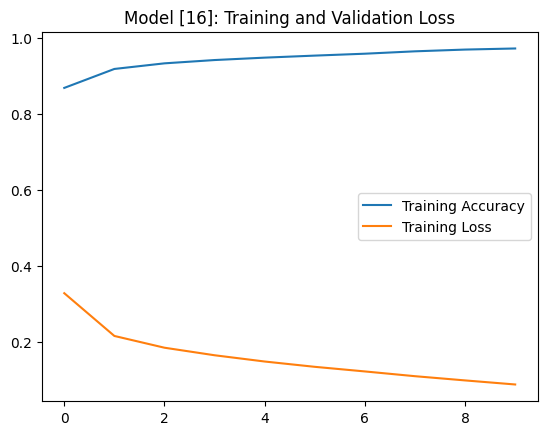

In [22]:
structure = [16]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1280128   
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)              

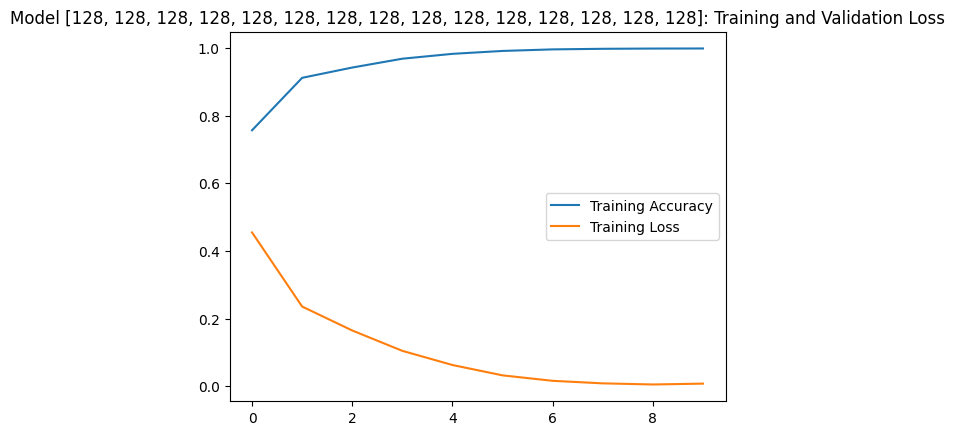

In [24]:
structure = [128,128,128,128,128,128,128,128,128,128,128,128,128,128,128]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                100010    
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 10)               

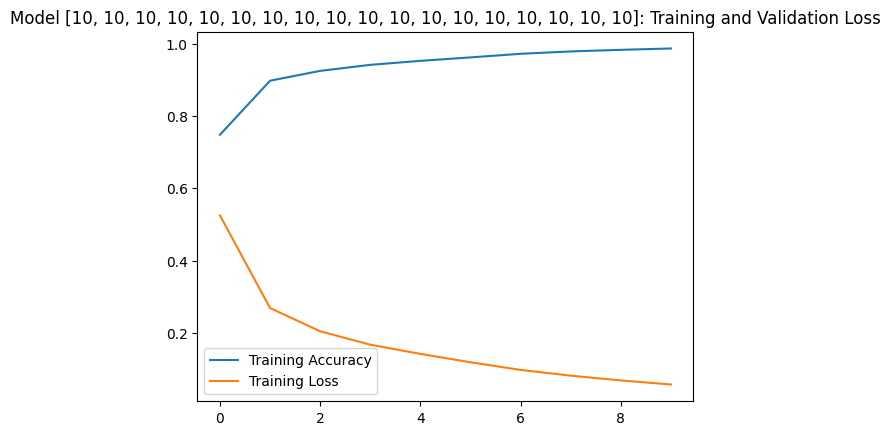

In [25]:
structure = [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels)

# 5. Introduce Overfitting

This part of the notebook addresses the concept of overfitting in machine learning models. It includes training a larger model for an extended period as a demonstration of how overfitting occurs, and discusses various strategies to prevent or mitigate overfitting in neural network models.

Typically, a model will overfit if:

- It has too many parameters (i.e., a large model).
- It's trained for too many epochs.
- There isn't enough training data.
- 
Here's how you can train the larger model for more epochs to induce overfitting:

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 512)               5120512   
                                                                 
 dense_54 (Dense)            (None, 512)               262656    
                                                                 
 dense_55 (Dense)            (None, 512)               262656    
                                                                 
 dense_56 (Dense)            (None, 512)               262656    
                                                                 
 dense_57 (Dense)            (None, 512)               262656    
                                                                 
 dense_58 (Dense)            (None, 512)               262656    
                                                                 
 dense_59 (Dense)            (None, 512)              

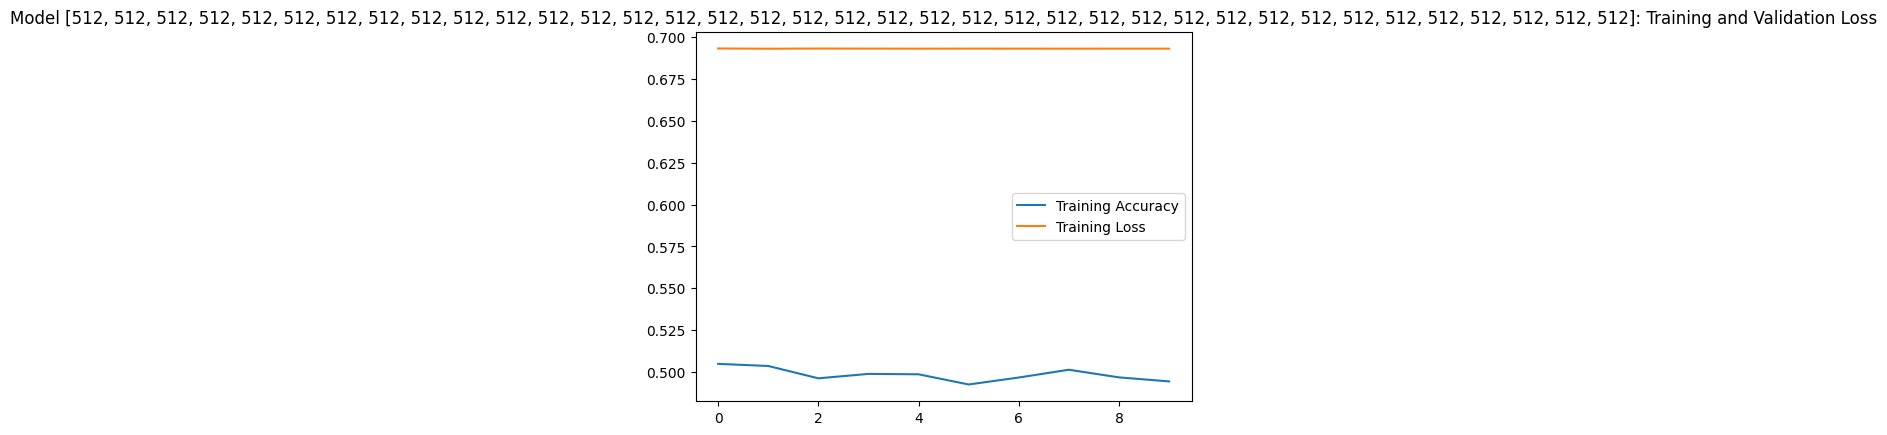

In [26]:
structure = [512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels)

Here we can see the effect of overfitting with 50% of accuracy. The structure of the larger network is too complex for the limited amount of training data. As a result, the network learns is too random and has a hard time increasing its accuracy on the validation data.

For preventing overfitting, there are many techniques including:

- Regularization
- Dropout
- Early stopping
- Using more training data or augmenting existing data
- Using simpler model architectures.

# 6. Introduce Underfitting

In contrast to the previous section, this part focuses on underfitting. It demonstrates the effects of underfitting by training a simpler model for a limited number of epochs. This section helps in understanding the signs of underfitting and how it affects model performance.

Typically, a model will underfit if:

- It's too simple to learn the underlying structure of the data.
- It's trained for too few epochs.
- There isn't enough training data.

Here's how you can train the smaller model for more epochs to induce underfitting:

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 1)                 10001     
                                                                 
 dense_107 (Dense)           (None, 2)                 4         
                                                                 
 dense_108 (Dense)           (None, 1)                 3         
                                                                 
Total params: 10008 (39.09 KB)
Trainable params: 10008 (39.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.4978
Epoch 2/5
782/782 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4973
Epoch 3/5
782/782 [==============================] - 1s 1ms/step - loss: 0.693

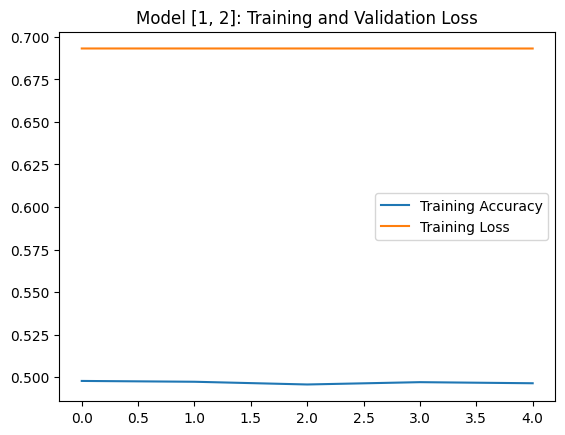

In [35]:
structure = [1,2]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels, epochs=5)

We can see the effect of underfitting with 50% of accuracy. The structure of the smaller network is too simple for the limited amount of training data. As a result the learning isn't good enough and the network has a hard time increasing its accuracy on the validation data.